# F3: Shifted Rosenbrock’s Function 

Minimum at 390

In [7]:
import sys
sys.path.append('../')
from functions import *
from PSO import *
import numpy as np
import matplotlib.pyplot as plt

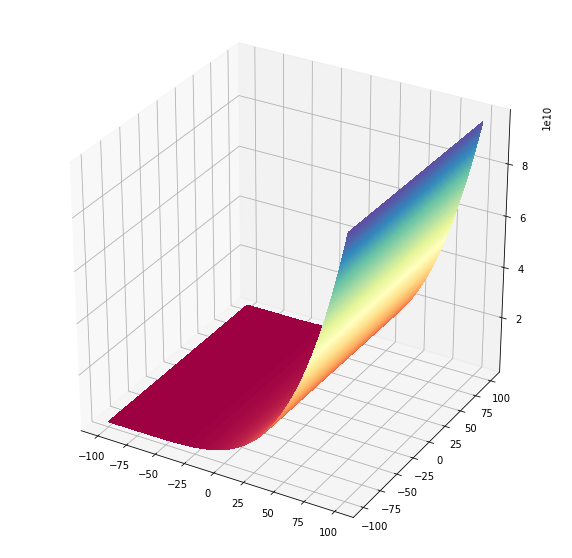

In [2]:
plot_fct(Shifted_Rosenbrock)

In [5]:
class F3_Shifted_Rosenbrock:
    
    nbFitness = 0
    
    def __init__(self, dim, bounds):
        self.dim = dim
        self.bounds=bounds
        F3_Shifted_Rosenbrock.nbFitness = 0

    def fitness(self, x):
        z=[]
        F = 0
        for i in range(0,x.shape[0]):
            z.append(x[i] - rosenbrock[i] + 1)
        for i in range(0,x.shape[0]-1):   
            F = F + 100*(z[i]**2-z[i+1])**2  + (z[i]-1)**2
        F3_Shifted_Rosenbrock.nbFitness += 1
        return F + f_bias[2]


## Paremeter choices

### Number of particules

The particules browse the search space. The bigger the search space is, the more we need particules. 

For the dimension 50, we take 300 particules. 

For the dimention 500, we take 3000 particules.

### Inertia factor

The inertia factors allows controling the velocity. If we want a particule to explore more, we need a inertia factor greater than 1. If we want to particule to exploite more, it should be smaller than one. 

With this function, we can see we don't have local minimums, but a global one, we don't need to explore a lot, but to exploite each good solution. 

We will use a inertia factor of 0.2

### Self confidence 

The self confidence allows to take into account the best solution of the particule. 

As we don't have local minimums, we need to have the self confidence greater than the swarm confidence to allow intensification.

### Swarm confidence 

The self confidence allows to take into account the best solution of the swarm.

Here we want it to be smaller than the self confidence to allow intensification.

## Dimension 50

In [9]:
problem=F3_Shifted_Rosenbrock(50, [-100,100])
swarm=Swarm(problem, numOfParticule=300, w=0.2, c1=1.6, c2=1.1)
optimize = Optimize(swarm, epsilon=0, N=300)
res = optimize.run()
print ('Best result ' + str(res[0][-1]))
print ('Best solution ' + str(swarm.best_swarm_position ))
print ('The number of function evaluations ' + str(res[1]))
print ('The computational time ' + str(res[2]))
plt.plot(res[0])
plt.show()

Best result 297557733.77970874
Best solution [-61.57382428 -31.93169311 -58.03411944  18.20562395  58.22213613
 -16.67184781  47.43314459  33.07347891 -65.52297626 -27.53321958
 -30.60866003  -9.50462796  84.12479705  58.58025359 -41.54613558
   9.20270799 -17.95895618  -8.07493421  52.26616223  42.9308628
  46.43341049 -16.95549381  32.8967868  -52.86391426 -24.46167991
 -82.43315661  28.8826488   -2.23938433 -77.96284322 -70.61320992
  99.68660244  25.48781067 -23.06063729  82.96357592 -10.49607463
 -79.06022496  54.46452865  91.03062848  36.86071117  41.2829321
  -2.88703947   7.25428865 -26.60416096   5.9133956  -20.00725568
 -63.7723632   72.97843262 -55.78542753 -37.46201125  46.34026796]
The number of function evaluations 0


IndexError: tuple index out of range

## Dimension 500